In [4]:
import pandas as pd 

mydataset = {
  'Nom': ["Diare", "bekale", "Diallo","Mignon"],
  'Prenom': ['youssouf', "coralie", "Moussa","Divin"],
  'Age':[21,20,22,19]
}

In [5]:
dico = {
    "note1":10,
    "note2":15,
    "note3":17
}


In [6]:
maSerie = pd.Series(dico)
print(maSerie)

note1    10
note2    15
note3    17
dtype: int64


In [7]:
dataFrame = pd.DataFrame(mydataset,index=["personne1","personne2","personne3","personne4"])
print(dataFrame)

              Nom    Prenom  Age
personne1   Diare  youssouf   21
personne2  bekale   coralie   20
personne3  Diallo    Moussa   22
personne4  Mignon     Divin   19


In [8]:
print(dataFrame.loc["personne2"])

Nom        bekale
Prenom    coralie
Age            20
Name: personne2, dtype: object


Lecture des fichiers csv

In [9]:
dataCSV = pd.read_csv("data.csv")
print(dataCSV)

     Duration  Pulse  Maxpulse  Calories
0        60.0    110       130     409.1
1        60.0    117       145     479.0
2        60.0    103       135     340.0
3        45.0    109       175     282.4
4        45.0    117       148     406.0
..        ...    ...       ...       ...
170      60.0    105       140     290.8
171      60.0    110       145     300.0
172      60.0    115       145     310.2
173      75.0    120       150     320.4
174      75.0    125       150     330.4

[175 rows x 4 columns]


In [10]:
dfFilter = dataCSV[dataCSV["Maxpulse"]<102]
print(dfFilter)

     Duration  Pulse  Maxpulse  Calories
25       60.0    130       101     300.0
99       15.0     80       100      50.5
108      90.0     90       100     500.0
109      90.0     90       100     500.4


moyenne des calorie des gens ayant une Maxpulse <102


In [11]:
moyM = dfFilter["Calories"].mean()
print(moyM)

337.725


Lecture des fichier JSON

In [12]:
dataJS = pd.read_json("data.json")
print(dataJS)


     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.4
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


Annalyse d'une trame de donné et netoyage

In [13]:
print(dataJS.info())

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB
None


supprimer les lignes contenants des valeurs vides de mon fichier csv

In [14]:
dataCSV.dropna(inplace=True)
print(dataCSV.info())

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  170 non-null    float64
 1   Pulse     170 non-null    int64  
 2   Maxpulse  170 non-null    int64  
 3   Calories  170 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.6 KB
None


remplacer les valeurs nuls par quelque chose 

In [15]:
dataCSV = pd.read_csv("data.csv")
""" tout remplacer"""
dataCSV.fillna(667,inplace=True)
print(dataCSV.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  175 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None


remplacer uniquement pour les colonnes specifiees

In [16]:
dataCSV = pd.read_csv("data.csv")
new = dataCSV["Calories"].fillna(140)
dataCSV["Calories"] = new
print(dataCSV.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  175 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None


remplacer les valeurs vides par ma une moyenne une medianne ou un mode

In [17]:
dataCSV = pd.read_csv("data.csv")
moy = dataCSV["Calories"].mean()
cal = dataCSV["Calories"].fillna(moy)
dataCSV["Calories"]=cal
print(dataCSV.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  175 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None


In [18]:
dataCSV = pd.read_csv("data.csv")
mediane = dataCSV["Calories"].median()
tmp = dataCSV["Calories"].fillna(mediane)
dataCSV["Calories"]= tmp
print(dataCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  175 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None


In [19]:
dataCSV = pd.read_csv("data.csv")
mode = dataCSV["Calories"].mode()[0]
tmp = dataCSV["Calories"].fillna(mode)
dataCSV["Calories"] = tmp
print(dataCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  175 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None


Netoyage des données qui sont sous le mauvais format (je peut les mettre au bon format ou les supprimer)

In [20]:
dataCSV = pd.read_csv("data.csv")
''' si dans la colone date les donnée doivent etre au format 
date mais ne sont pas je fait :
dataCSV["Duration"] = pd.to_datetime(dataCSV["Duration"])
'''

' si dans la colone date les donnée doivent etre au format \ndate mais ne sont pas je fait :\ndataCSV["Duration"] = pd.to_datetime(dataCSV["Duration"])\n'

suppresion des des données qui ne sont pas au bon format

In [21]:
"""Supprimer les lignes avec une valeur NULL dans la colonne « Date » """
dataCSV = pd.read_csv("data.csv")
print(dataCSV.info())
dataCSV.dropna(subset=["Calories"],inplace=True)
print(dataCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  175 non-null    float64
 1   Pulse     175 non-null    int64  
 2   Maxpulse  175 non-null    int64  
 3   Calories  170 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  170 non-null    float64
 1   Pulse     170 non-null    int64  
 2   Maxpulse  170 non-null    int64  
 3   Calories  170 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.6 KB
None


remplacemnt de donnée erroné 


In [22]:
dataCSV = pd.read_csv("data.csv")
dataCSV.loc[4,"Duration"] = 41
print(dataCSV)

     Duration  Pulse  Maxpulse  Calories
0        60.0    110       130     409.1
1        60.0    117       145     479.0
2        60.0    103       135     340.0
3        45.0    109       175     282.4
4        41.0    117       148     406.0
..        ...    ...       ...       ...
170      60.0    105       140     290.8
171      60.0    110       145     300.0
172      60.0    115       145     310.2
173      75.0    120       150     320.4
174      75.0    125       150     330.4

[175 rows x 4 columns]


pour les grand enssemble de donné je doit definir des règles, dans mon cas il ne faut pas que la duré depase 75 minutes

In [23]:
dataCSV = pd.read_csv("data.csv")
moy = dataCSV["Duration"].mean()

for i in dataCSV.index:
    if dataCSV.loc[i ,"Duration"] >75:
        dataCSV.loc[i ,"Duration"] = moy

In [24]:
print(dataCSV)

     Duration  Pulse  Maxpulse  Calories
0        60.0    110       130     409.1
1        60.0    117       145     479.0
2        60.0    103       135     340.0
3        45.0    109       175     282.4
4        45.0    117       148     406.0
..        ...    ...       ...       ...
170      60.0    105       140     290.8
171      60.0    110       145     300.0
172      60.0    115       145     310.2
173      75.0    120       150     320.4
174      75.0    125       150     330.4

[175 rows x 4 columns]


pour la suppression

In [25]:
for i in dataCSV.index:
    if dataCSV.loc[i,"Duration"]<60 :
        dataCSV.drop(i,inplace=True)
moyCal = dataCSV["Calories"].mean()
dataCSV["Calories"].fillna(moy)
dataCSV["Calories"] = tmp

print(dataCSV.info())

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  112 non-null    float64
 1   Pulse     112 non-null    int64  
 2   Maxpulse  112 non-null    int64  
 3   Calories  112 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 8.4 KB
None


Supprimer Les doublons 

In [26]:
print(dataCSV.duplicated().to_string())

0      False
1      False
2      False
5      False
6      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
18      True
19      True
20      True
21     False
23     False
25     False
27     False
28     False
29     False
30     False
31      True
32      True
33      True
34     False
35     False
36     False
38     False
39     False
40     False
41     False
42      True
43      True
44      True
47     False
48     False
49     False
50     False
51     False
52     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
66     False
67     False
68     False
71     False
72     False
73     False
75     False
76     False
77      True
78     False
79     False
81     False
84     False
85     False
89     False
93     False
96     False
105    False
107    False
108    False
109    False
112    False
114    False
115    False
116    False
120    False
121    False
122    False

In [27]:
dataCSV.drop_duplicates(inplace=True)

In [28]:
print(dataCSV.duplicated())

0      False
1      False
2      False
5      False
6      False
       ...  
170    False
171    False
172    False
173    False
174    False
Length: 102, dtype: bool


corelation  :

In [29]:
dataCSV = pd.read_csv("data.csv")
print(dataCSV.corr())

          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.099288  0.015658  0.659725
Pulse    -0.099288  1.000000  0.788416  0.031478
Maxpulse  0.015658  0.788416  1.000000  0.210086
Calories  0.659725  0.031478  0.210086  1.000000


Tracage

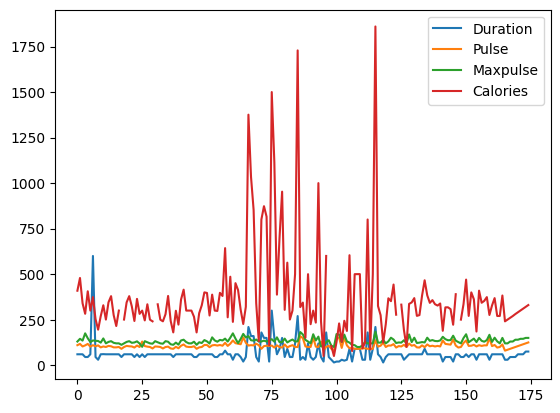

In [30]:
import matplotlib.pyplot as plt
dataCSV.plot()
plt.show()

nuages de points

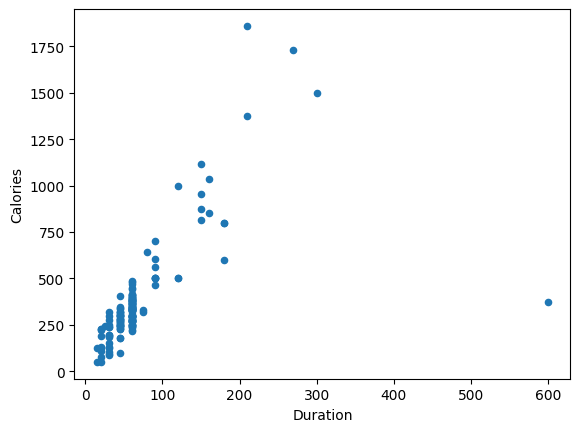

In [34]:
dataCSV.plot(kind='scatter',x = 'Duration',y ='Calories')
plt.show()


Histogramme

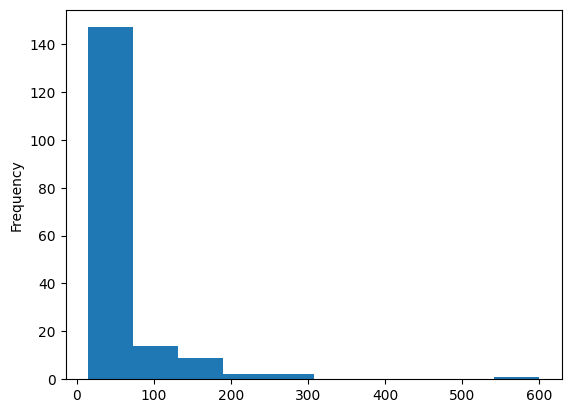

In [32]:
dataCSV['Duration'].plot(kind='hist')
plt.show()

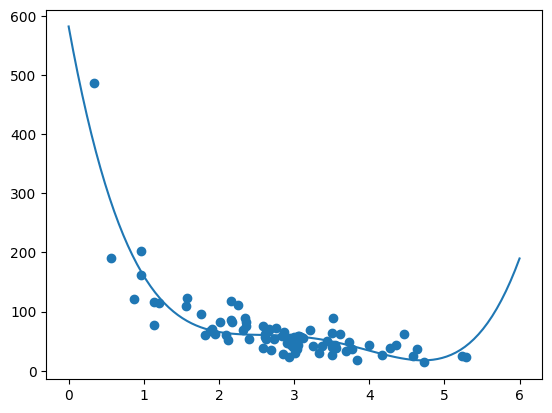

In [33]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()